#  Artificial Intelligence Capstone Project on Retail

### Project Task: Week 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA

from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train_data.csv")
train.head()

C:\Users\Public\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [3]:
test_val= pd.read_csv("test_data_hidden.csv")
test_val.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test= pd.read_csv("test_data.csv")
test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,1,1,0,1
1,2,5,2015-07-31,1,1,0,1
2,3,5,2015-07-31,1,1,0,1
3,4,5,2015-07-31,1,1,0,1
4,5,5,2015-07-31,1,1,0,1


In [5]:
train_1 = train.copy()
test_val_1 = test_val.copy()
test_1 = test.copy()

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 12 columns):
Store            982644 non-null int64
DayOfWeek        982644 non-null int64
Date             982644 non-null object
Sales            982644 non-null int64
Customers        982644 non-null int64
Open             982644 non-null int64
Promo            982644 non-null int64
StateHoliday     982644 non-null object
SchoolHoliday    982644 non-null int64
year             982644 non-null int64
month            982644 non-null int64
day              982644 non-null int64
dtypes: int64(10), object(2)
memory usage: 90.0+ MB


In [16]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
test.isna().sum()

Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
train.DayOfWeek.value_counts()

2    141204
7    140270
6    140270
5    140270
4    140270
1    140270
3    140090
Name: DayOfWeek, dtype: int64

In [10]:
test.DayOfWeek.value_counts()

5    5575
4    5575
3    5575
7    4460
6    4460
2    4460
1    4460
Name: DayOfWeek, dtype: int64

In [11]:
train.Open.value_counts()

1    814204
0    168440
Name: Open, dtype: int64

In [12]:
test.Open.value_counts()

1    30188
0     4377
Name: Open, dtype: int64

In [14]:
train.Promo.value_counts()

0    609059
1    373585
Name: Promo, dtype: int64

In [13]:
test.Promo.value_counts()

0    20070
1    14495
Name: Promo, dtype: int64

In [43]:
train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [16]:
test.StateHoliday.value_counts()

0    34565
Name: StateHoliday, dtype: int64

In [17]:
train.SchoolHoliday.value_counts()

0    813700
1    168944
Name: SchoolHoliday, dtype: int64

In [18]:
test.SchoolHoliday.value_counts()

0    21788
1    12777
Name: SchoolHoliday, dtype: int64

In [ ]:
train.Date.unique()

In [37]:
train['year'].value_counts()

2013    406974
2014    373855
2015    201815
Name: year, dtype: int64

In [5]:
test_val.sort_values(['Store'],inplace=True)
test.sort_values(['Store'],inplace=True)
combi = train.append(test_val , ignore_index=True)
print(combi.shape)
combi =combi.append(test , ignore_index=True)
print(combi.shape)
combi['year']=pd.to_datetime(combi['Date'],format='%Y-%m-%d').dt.year 
combi['month']=pd.to_datetime(combi['Date'],format='%Y-%m-%d').dt.month 
combi['day']=pd.to_datetime(combi['Date'],format='%Y-%m-%d').dt.day
combi['year'] = combi.year.replace({2013 : 0, 2014 : 1 , 2015 : 2 })
combi['StateHoliday'] = combi.StateHoliday.replace({'0' : 0, 'a' : 1 , 'b' : 2 ,'c' : 3})
combi.head()

(1017209, 9)


C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(1051774, 9)


,Customers,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store,year,month,day
0,568.0,2015-06-30,2,1,1,5735.0,0,0,1,2,6,30
1,877.0,2015-06-30,2,1,1,9863.0,0,0,2,2,6,30
2,1072.0,2015-06-30,2,1,1,13261.0,1,0,3,2,6,30
3,1488.0,2015-06-30,2,1,1,13106.0,0,0,4,2,6,30
4,645.0,2015-06-30,2,1,1,6635.0,0,0,5,2,6,30


In [6]:
combi1= pd.get_dummies(combi,columns=['DayOfWeek', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'year','Store','day','month'],drop_first=True)
# combi1=pd.read_csv('combi1.csv')
# combi1.drop(['Unnamed: 0'],axis=True,inplace=True)
combi1.head()

,Customers,Date,Sales,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,568.0,2015-06-30,5735.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,877.0,2015-06-30,9863.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1072.0,2015-06-30,13261.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1488.0,2015-06-30,13106.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,645.0,2015-06-30,6635.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [6]:
combi2= pd.get_dummies(combi,columns=['DayOfWeek', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'year','day','month'],drop_first=True)
combi2.head()

,Customers,Date,Sales,Store,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,568.0,2015-06-30,5735.0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,877.0,2015-06-30,9863.0,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1072.0,2015-06-30,13261.0,3,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1488.0,2015-06-30,13106.0,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,645.0,2015-06-30,6635.0,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
train.shape,test_val.shape,test.shape

((982644, 9), (34565, 9), (34565, 7))

In [8]:
train1 = combi1.iloc[:982644].reset_index(drop=True)
test_val1 = combi1.iloc[982644:1017209].reset_index(drop=True)
test1 = combi1.iloc[1017209:].reset_index(drop=True)
train1.shape,test_val1.shape,test1.shape

((982644, 1172), (34565, 1172), (34565, 1172))

In [7]:
train2 = combi2.iloc[:982644].reset_index(drop=True)
test_val2 = combi2.iloc[982644:1017209].reset_index(drop=True)
test2 = combi2.iloc[1017209:].reset_index(drop=True)
train2.shape,test_val2.shape,test2.shape

((982644, 59), (34565, 59), (34565, 59))

In [27]:
train.corr()['Sales']

Store              0.005338
Sales              1.000000
Customers          0.895700
month              0.048435
day               -0.014450
DayOfWeek_2        0.132176
DayOfWeek_3        0.081984
DayOfWeek_4        0.048159
DayOfWeek_5        0.099717
DayOfWeek_6        0.010149
DayOfWeek_7       -0.587966
Open_1             0.679248
Promo_1            0.451383
StateHoliday_1    -0.205744
StateHoliday_2    -0.119044
StateHoliday_3    -0.093835
SchoolHoliday_1    0.076141
year_1             0.014717
year_2             0.009503
Name: Sales, dtype: float64

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=train._get_numeric_data()
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"]=x.columns
vif

,VIF,features
0,3.945474,Store
1,22.878068,Sales
2,15.470602,Customers
3,4.541866,month
4,4.257005,day
5,2.011796,DayOfWeek_2
6,2.025271,DayOfWeek_3
7,2.046647,DayOfWeek_4
8,1.995472,DayOfWeek_5
9,2.271216,DayOfWeek_6


#### Linear Regression with STORE as feature

In [26]:
Y_train = train1['Sales']
Y_val = test_val1['Sales']

In [22]:
X_train = train1.drop(['Sales','Date','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Customers'],axis=1).values
lr_1 = LinearRegression()
lr_1.fit(X_train,Y_train)
Y_pred1 = lr_1.predict(X_val)
print('MSE',np.sqrt(mean_squared_error(Y_pred1,Y_val)))
print('MAE',mean_absolute_error(Y_pred1,Y_val))
print('train model score',lr_1.score(X_train,Y_train))
print('test model score',lr_1.score(X_val,Y_val))

MSE 1428.9181706827264
MAE 1051.5557239043858
train model score 0.8365645595889427
test model score 0.8430035399815864


#### Linear Regression without STORE as feature

In [13]:
X_train1 = train2.drop(['Sales','Date','Customers'],axis=1).values
X_val1 = test_val2.drop(['Sales','Date','Customers'],axis=1).values
lr_2 = LinearRegression()
lr_2.fit(X_train1,Y_train)
Y_pred2 = lr_2.predict(X_val1)
print('MSE',np.sqrt(mean_squared_error(Y_pred2,Y_val)))
print('MAE',mean_absolute_error(Y_pred2,Y_val))
print('train model score',lr_2.score(X_train1,Y_train))
print('test model score',lr_2.score(X_val1,Y_val))

MSE 2520.0716734481657
MAE 1731.7047379515243
train model score 0.564626733803036
test model score 0.5116840301951024


#### Linear Regression - Separate model for each STORE

In [19]:
Y_pred3=np.zeros(test_val.shape[0])

train_store = train2.groupby(['Store'])
test_store = test_val2.groupby(['Store'])

for i in range(1,1116):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers'],axis=1).values
    Y_train = a['Sales']
    #Y_val = b['Sales']
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    for j in b.index:
        Y_pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(Y_pred3,Y_val)))
print('MAE',mean_absolute_error(Y_pred3,Y_val))

MSE 2886004774448802.5
MAE 65858982569725.73


So from the above 3 models we can conclude that the model perform better with 'Store' as feature.
Also the average of all the separate model based on Store Id is the worst model.

#### Average Ensemble Model of first and second model

In [23]:
final_pred=(Y_pred1+Y_pred2)/2
print('MSE',np.sqrt(mean_squared_error(final_pred,Y_val)))
print('MAE',mean_absolute_error(final_pred,Y_val))

MSE 1786.572723527162
MAE 1295.5365594353661


#### Weighted Average Ensemble Model of first and second model

In [24]:
final_pred=Y_pred1*0.7+Y_pred2*0.3
print('MSE',np.sqrt(mean_squared_error(final_pred,Y_val)))
print('MAE',mean_absolute_error(final_pred,Y_val))

MSE 1578.2148177872348
MAE 1163.7769636251703


#### Regularization of 1st Model

In [32]:
X_train = train1.drop(['Sales','Date','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Customers'],axis=1).values
rr =Ridge(alpha=10)
rr.fit(X_train,Y_train)
Y_pred1 = rr.predict(X_val)
print('MSE',np.sqrt(mean_squared_error(Y_pred1,Y_val)))
print('MAE',mean_absolute_error(Y_pred1,Y_val))
print('train model score',rr.score(X_train,Y_train))
print('test model score',rr.score(X_val,Y_val))

MSE 1431.5196149136414
MAE 1053.9640706528064
train model score 0.8363551306623415
test model score 0.8424313738215597


Regualrization technique is not enhancing the performance.

### Project Task: Week 2
 

In [5]:
train=train[train.Open==1]
shape1=train.shape[0]
print(train.shape[0])
combi = train.append(test_val , ignore_index=True,sort=False)
shape2=combi.shape[0]
print(combi.shape)
combi =combi.append(test , ignore_index=True,sort=False)
print(combi.shape)
combi['year']=pd.to_datetime(combi['Date'],format='%Y-%m-%d').dt.year 
combi['month']=pd.to_datetime(combi['Date'],format='%Y-%m-%d').dt.month 
combi['day']=pd.to_datetime(combi['Date'],format='%Y-%m-%d').dt.day
combi['year'] = combi.year.replace({2013 : 0, 2014 : 1 , 2015 : 2 })
combi['StateHoliday'] = combi.StateHoliday.replace({'0' : 0, 'a' : 1 , 'b' : 2 ,'c' : 3})
#with Store Id as features
combi1= pd.get_dummies(combi,columns=['DayOfWeek', 'Promo','StateHoliday', 'SchoolHoliday', 'year','Store','day','month'],drop_first=True)
#without Store Id as features
combi2= pd.get_dummies(combi,columns=['DayOfWeek', 'Promo','StateHoliday', 'SchoolHoliday', 'year','day','month'],drop_first=True)

print(train.shape,test_val.shape,test.shape)

train1 = combi1.iloc[:shape1].reset_index(drop=True)
test_val1 = combi1.iloc[shape1:shape2].reset_index(drop=True)
test1 = combi1.iloc[shape2:].reset_index(drop=True)
print(train1.shape,test_val1.shape,test1.shape)

train2 = combi2.iloc[:shape1].reset_index(drop=True)
test_val2 = combi2.iloc[shape1:shape2].reset_index(drop=True)
test2 = combi2.iloc[shape2:].reset_index(drop=True)
print(train2.shape,test_val2.shape,test2.shape)

814204
(848769, 9)
(883334, 9)
(814204, 9) (34565, 9) (34565, 7)
(814204, 1172) (34565, 1172) (34565, 1172)
(814204, 59) (34565, 59) (34565, 59)


In [6]:
Y_train = train1['Sales']
Y_val = test_val1['Sales']

#### Model1

In [41]:

X_train = train1.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Open','Customers'],axis=1).values

lr = LinearRegression()
lr.fit(X_train,Y_train)
pred1 = lr.predict(X_val)

ind=test_val[test_val.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))

# MSE 1428.9181706827264
# MAE 1051.555723904386

MSE 1229.9197388602236
MAE 865.6514844033625


#### Model2

In [47]:
X_train1 = train2.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val1 = test_val2.drop(['Sales','Date','Open','Customers'],axis=1).values

lr = LinearRegression()
lr.fit(X_train1,Y_train)
pred2 = lr.predict(X_val1)

ind=test_val[test_val.Open==0].index
for i in ind:
    pred2[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred2,Y_val)))
print('MAE',mean_absolute_error(pred2,Y_val))

# MSE 2520.0716734481657
# MAE 1731.704737951524

MSE 2530.1635832559
MAE 1725.719012601922


#### Model3

In [48]:
pred3=np.zeros(test_val.shape[0])

train_store = train2.groupby(['Store'])
test_store = test_val2.groupby(['Store'])

for i in range(1,1116):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    Y_train = a['Sales']
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred3[j]=0
        else:
            pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(pred3,Y_val)))
print('MAE',mean_absolute_error(pred3,Y_val))

# MSE 2886004774448802.0
# MAE 65858982569725.75

MSE 1014.9293535430203
MAE 670.5513943441184


#### Regularization of Model 3

From the above model,we can see the performance has increased due to data cleaning except in 2nd model which remains almost same. In this case third model has outperformed which was earlier worst model.

In [49]:
train_store = train2.groupby(['Store'])
test_store = test_val2.groupby(['Store'])

for i in range(1,1116):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    Y_train = a['Sales']
    lr = Ridge(alpha=20)
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred3[j]=0
        else:
            pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(pred3,Y_val)))
print('MAE',mean_absolute_error(pred3,Y_val))


MSE 930.9742188387742
MAE 629.3727064444969


Only 3rd model's performance is increasing with regularization 

model3:                 MSE 1014.9293535430203         MAE 670.5513943441184

after reegularization:  MSE 930.9742188387742          MAE 629.3727064444969

#### Random Forest Regression 

In [50]:
#With Store as Feature
X_train = train1.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Open','Customers'],axis=1).values

clf = RandomForestRegressor(n_estimators=500,max_features='sqrt',max_depth=6,random_state=0,n_jobs=7)
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val[test_val.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))


MSE 2571.8525994831966
MAE 1786.634280806513


In [7]:
#Without Store as Feature
X_train = train2.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val2.drop(['Sales','Date','Open','Customers'],axis=1).values
clf = RandomForestRegressor(n_estimators=500,max_features='sqrt',max_depth=6,random_state=0,n_jobs=7)
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val[test_val.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))

MSE 2544.663201550362
MAE 1728.0781382597204


In [8]:
#Separate model for each Store
pred3=np.zeros(test_val.shape[0])

train_store = train2.groupby(['Store'])
test_store = test_val2.groupby(['Store'])

for i in range(1,1116):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    Y_train = a['Sales']
    clf = RandomForestRegressor(n_estimators=500,max_features='sqrt',max_depth=6,random_state=0,n_jobs=7)
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred3[j]=0
        else:
            pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(pred3,Y_val)))
print('MAE',mean_absolute_error(pred3,Y_val))

MSE 1077.7202738114058
MAE 728.2337472832369


#### PCA

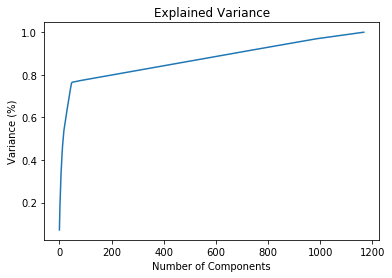

In [13]:
X_train = train1.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Open','Customers'],axis=1).values
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()
# Cumulative Variance explains
# var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# print(var1.shape)
# print(var1)

In [14]:
X_train = train1.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Open','Customers'],axis=1).values
Y_train = train1['Sales']
Y_val = test_val1['Sales']

pca = PCA(n_components=50)  
X_train = pca.fit_transform(X_train)  
X_val= pca.transform(X_val) 

clf = RandomForestRegressor(n_estimators=500,max_features='sqrt',max_depth=6,random_state=0,n_jobs=7)
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val[test_val.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))

MSE 2516.7922443348452
MAE 1710.1717909599372


#### XGBRegressor

In [15]:
#With Store as Feature
X_train = train1.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Open','Customers'],axis=1).values

clf = XGBRegressor(n_estimators=500, learning_rate=0.5,max_depth=6,random_state=0,n_jobs=-1)
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val[test_val.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))


/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


MSE 1116.6123278288517
MAE 742.5063903587868


In [44]:
#Without Store as Feature
X_train = train2.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val2.drop(['Sales','Date','Open','Customers'],axis=1).values
clf = XGBRegressor(n_estimators=500, learning_rate=0.5,max_depth=6,random_state=0,n_jobs=-1)
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val[test_val.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))

MSE 1138.3182388080122
MAE 764.0298774444434


In [45]:
#Separate model for each Store
pred3=np.zeros(test_val.shape[0])

train_store = train2.groupby(['Store'])
test_store = test_val2.groupby(['Store'])

for i in range(1,1116):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    Y_train = a['Sales']
    clf = XGBRegressor(n_estimators=500, learning_rate=0.5,max_depth=6,random_state=0,n_jobs=-1)
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred3[j]=0
        else:
            pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(pred3,Y_val)))
print('MAE',mean_absolute_error(pred3,Y_val))

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


MSE 1163.4746405811502
MAE 754.1279379541305


In [11]:
X_train.shape,Y_train.shape

((814204, 50), (754,))

In [12]:
X_train = train1.drop(['Sales','Date','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Customers'],axis=1).values
Y_train = train1['Sales']
Y_val = test_val1['Sales']
pca = PCA(n_components=50) 
X_train = pca.fit_transform(X_train)  
X_val= pca.transform(X_val) 

clf = XGBRegressor(n_estimators=500, learning_rate=0.1,max_depth=6,random_state=0,n_jobs=-1,objective='reg:linear', 
                   booster='gbtree')
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val[test_val.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


MSE 3750.853932992984
MAE 2391.859036063734


#### Time-series model

In [34]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
Train = pd.read_csv("train_data.csv", parse_dates=['Date'], index_col='Date',date_parser=dateparse)
Test_val = pd.read_csv("test_data_hidden.csv", parse_dates=['Date'], index_col='Date',date_parser=dateparse)
Train=Train[['Store','Sales','Open','DayOfWeek']]
Test_val=Test_val[['Store','Sales','Open','DayOfWeek']]
print ('\n Parsed Data:')
Train.sort_values(['Date'],axis=0,inplace=True)
Test_val.sort_values(['Date'],axis=0,inplace=True)
print (Train.head())

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



 Parsed Data:
            Store  Sales  Open  DayOfWeek
Date                                     
2013-01-01   1115      0     0          2
2013-01-01    379      0     0          2
2013-01-01    378      0     0          2
2013-01-01    377      0     0          2
2013-01-01    376      0     0          2


#### Store 1

In [4]:
store1=Train[Train.Store==1]
test_store1=Test_val[Test_val.Store==1]

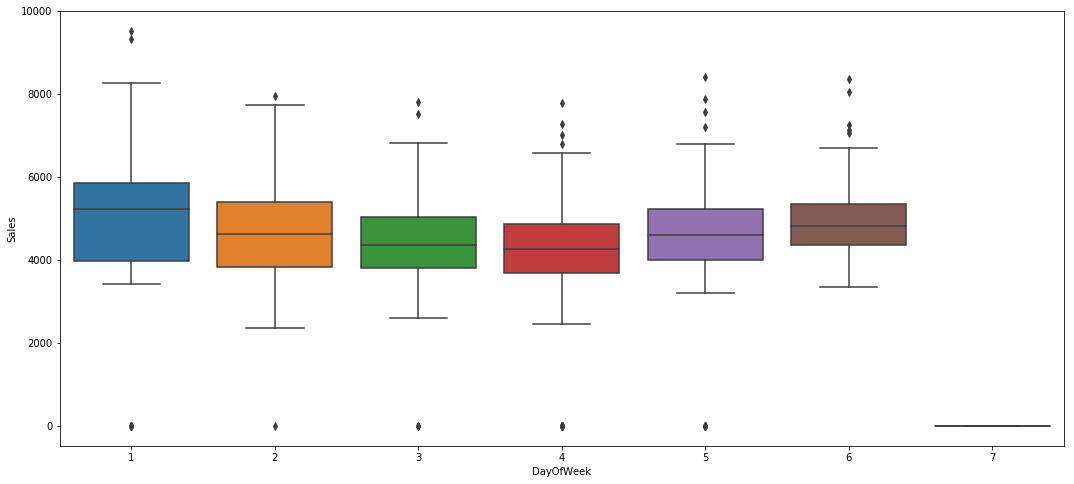

In [72]:
sns.boxplot(x="DayOfWeek", y="Sales", data=store1)

Monday=1, Sunday=7.

Here we can find on Sunday stores are closed. Monday has little larger sales, Thurdays has little smaller. There's a few outliers on all days(except Sunday) but it is less on Weekdays(1,3)

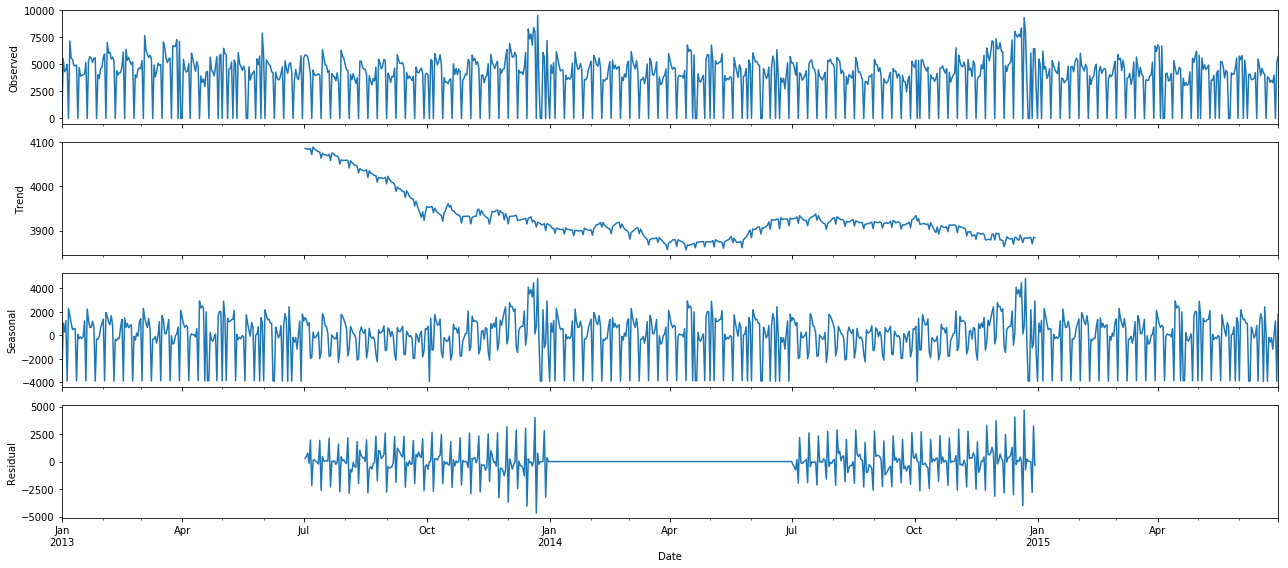

In [8]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(store1['Sales'], model='additive',freq=365)
fig = decomposition.plot()
plt.show()

In [9]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

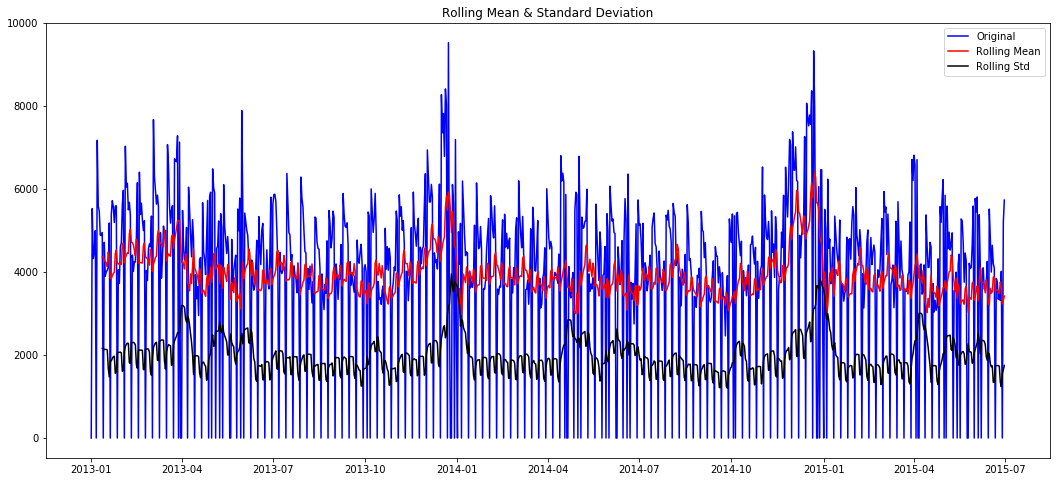

Results of Dickey-Fuller Test:
Test Statistic                  -4.236942
p-value                          0.000570
#Lags Used                      21.000000
Number of Observations Used    889.000000
Critical Value (1%)             -3.437727
Critical Value (5%)             -2.864797
Critical Value (10%)            -2.568504
dtype: float64


In [10]:
test_stationarity(store1['Sales'])

The smaller p-value, the more likely it's stationary. Here our p-value is 0.000415. It's actually good, but as we just visually found a little downward trend, we want to be more strict, i.e. if the p value further decreases, this series would be  more likely to be stationary.
To get a stationary data, there's many techiniques. We can use log, differencing etc..

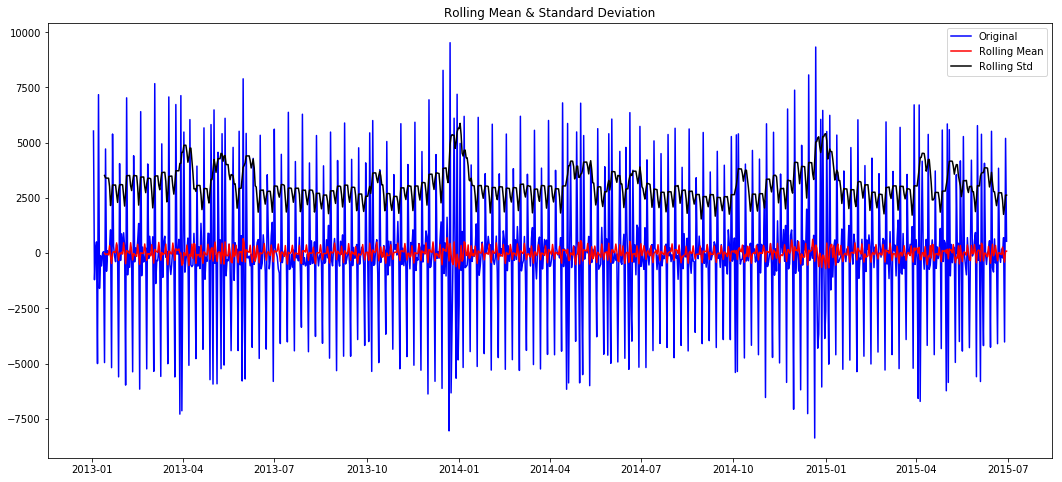

Results of Dickey-Fuller Test:
Test Statistic                -1.134395e+01
p-value                        1.038132e-20
#Lags Used                     2.000000e+01
Number of Observations Used    8.890000e+02
Critical Value (1%)           -3.437727e+00
Critical Value (5%)           -2.864797e+00
Critical Value (10%)          -2.568504e+00
dtype: float64


In [11]:
first_diff = store1['Sales'] - store1['Sales'].shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff)

After differencing, the p-value is extremely small. Thus this series is very likely to be stationary.

In [80]:
#AR model
ar_mod = ARIMA(store1.Sales, (9,1,0),freq='D')
res=ar_mod.fit(disp=False)
Y_pred = res.forecast(steps=31)[0]
print('MSE',np.sqrt(mean_squared_error(Y_pred,test_store1.Sales)))
print('MAE',mean_absolute_error(Y_pred,test_store1.Sales))

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


MSE 1133.8562710249823
MAE 895.9855008699199


In [84]:
#MA model
ma_mod = ARIMA(store1.Sales, (0,1,1),freq='D')
res=ma_mod.fit(disp=False)
Y_pred = res.forecast(steps=31)[0]
print('MSE',np.sqrt(mean_squared_error(Y_pred,test_store1.Sales)))
print('MAE',mean_absolute_error(Y_pred,test_store1.Sales))

MSE 1642.0868150322526
MAE 1182.9753111799089


In [90]:
#ARIMA model
arima_mod = ARIMA(store1.Sales, (9,1,9),freq='D')
res=arima_mod.fit(disp=False)
Y_pred = res.forecast(steps=31)[0]
print('MSE',np.sqrt(mean_squared_error(Y_pred,test_store1.Sales)))
print('MAE',mean_absolute_error(Y_pred,test_store1.Sales))
store1['pred']=Y_pred

MSE 633.5916329917548
MAE 465.4295796025833


C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Project Task: Week 3

#### Implementing Neural Networks:


#### LSTM for store1

In [8]:
train_store1 = store1.iloc[:, 1:2].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_store1 = sc.fit_transform(train_store1)

X_train = []
Y_train = []
for i in range(30, 911):
    X_train.append(train_store1[i-30:i, 0])
    Y_train.append(train_store1[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
regressor = Sequential()
regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(LSTM(units = 50))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 64, shuffle=False)


Epoch 1/100
881/881 [==============================] - 23s 26ms/step - loss: 0.0923
Epoch 2/100
881/881 [==============================] - 3s 4ms/step - loss: 0.0485
Epoch 3/100
881/881 [==============================] - 3s 4ms/step - loss: 0.0454
Epoch 4/100
881/881 [==============================] - 3s 4ms/step - loss: 0.0449
Epoch 5/100
881/881 [==============================] - 3s 4ms/step - loss: 0.0450
Epoch 6/100
881/881 [==============================] - 3s 4ms/step - loss: 0.0450
Epoch 7/100
881/881 [==============================] - 3s 4ms/step - loss: 0.0450
Epoch 8/100
881/881 [==============================] - 3s 4ms/step - loss: 0.0450
Epoch 9/100
881/881 [==============================] - 3s 3ms/step - loss: 0.0451
Epoch 10/100
881/881 [==============================] - 3s 4ms/step - loss: 0.0451
Epoch 11/100
881/881 [==============================] - 3s 4ms/step - loss: 0.0451
Epoch 12/100
881/881 [==============================] - 3s 4ms/step - loss: 0.0450
Epoch 13/10

In [29]:
total_data = pd.concat((store1['Sales'], test_store1['Sales']), axis = 0)
inputs = total_data[len(total_data) - len(test_store1) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 61):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred = regressor.predict(X_test)
pred= sc.inverse_transform(pred)
print(np.sqrt(mean_squared_error(pred,test_store1.Sales)))
print(mean_absolute_error(pred,test_store1.Sales)) 


1544.3219893558846
1043.4500456779233


In [ ]:
# Visualising the results
plt.plot(test_store1.Sales, color = 'red', label = 'Actual Sales')
plt.plot(pred, color = 'blue', label = 'Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sale')
plt.legend()
plt.show()

#### Applying ANN:


In [15]:
#Model1
X_train = train2.drop(['Sales','Date','Customers'],axis=1).values
X_val = test_val2.drop(['Sales','Date','Customers'],axis=1).values
Y_train = pd.DataFrame(train2['Sales'])
Y_val = test_val2['Sales']
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
Y_train = sc.fit_transform(Y_train)

model = Sequential()
model.add(Dense(100, activation='relu', input_dim = X_train.shape[1]))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='linear',kernel_initializer='normal') )
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=10, batch_size=64,shuffle=False,verbose=0)
Y_pred = model.predict(X_val, batch_size=64,verbose=0)
Y_pred= sc.inverse_transform(Y_pred)
print('MSE',np.sqrt(mean_squared_error(Y_pred,Y_val)))
print('MAE',mean_absolute_error(Y_pred,Y_val))
# MSE 2515.353601819651
#MAE 1676.8835278851793

MSE 2563.1362612696907
MAE 1831.2433319952684


In [10]:
#model2
X_train = train1.drop(['Sales','Date','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Customers'],axis=1).values
Y_train = pd.DataFrame(train1['Sales'])
Y_val = test_val1['Sales']
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
Y_train = sc.fit_transform(Y_train)

model = Sequential()
model.add(Dense(100, activation='relu', input_dim = X_train.shape[1]))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear') )
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=10, batch_size=64,shuffle=False,verbose=0)
Y_pred = model.predict(X_val, batch_size=64,verbose=0)
Y_pred= sc.inverse_transform(Y_pred)


print('MSE',np.sqrt(mean_squared_error(Y_pred,Y_val)))
print('MAE',mean_absolute_error(Y_pred,Y_val))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
MSE 1690.6897455191363
MAE 1170.5848143327298
